<a href="https://colab.research.google.com/github/MariiaBuhorska/Google-Colab-PYTHON-UA-Data/blob/main/dnipro_work_positions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Отримання даних**

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Дніпро")
data_json = response.json()

**Створення DataFrame**


In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,702
1,2022-05-24,726
2,2022-05-25,715
3,2022-05-26,742
4,2022-05-27,768


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

**Підготовка даних**


In [ ]:
df["at"] = pd.to_datetime(df["at"])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns= {"at" : "Дата", "val" : "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-05-23,702
1,2022-05-24,726
2,2022-05-25,715
3,2022-05-26,742
4,2022-05-27,768


In [ ]:
df.set_index('Дата', inplace=True)

**Побудова графіків**

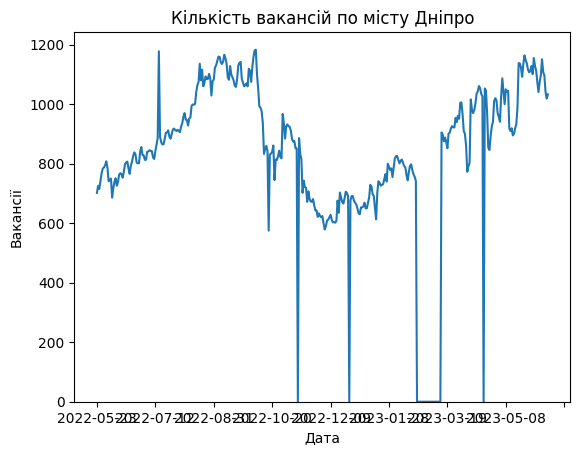

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по місту Дніпро")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom=0)
plt.show()


In [ ]:
df["Вакансії"] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()


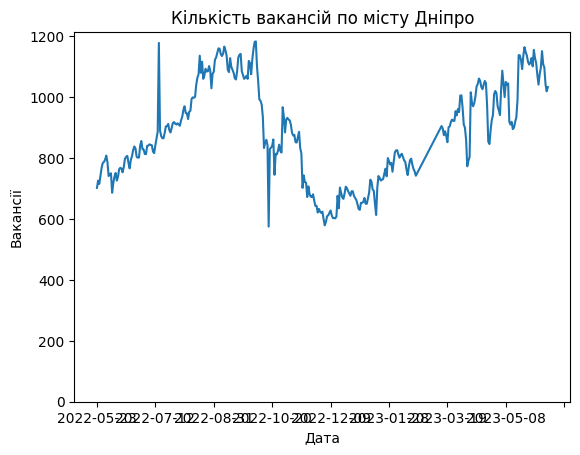

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по місту Дніпро")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom=0)
plt.show()

In [ ]:
df['rolling_mean'] = df["Вакансії"].rolling(window=7).mean()

In [ ]:
df

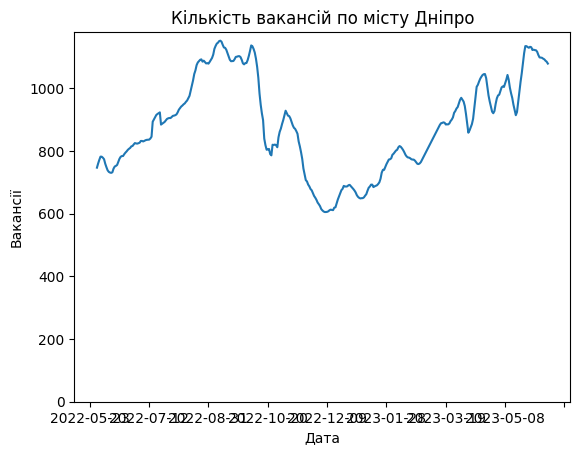

In [ ]:
df["rolling_mean"].plot()
plt.title("Кількість вакансій по місту Дніпро")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom=0)
plt.show()


**Друга частина**





In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Харків")
data_json = response.json()

df_harkiv = pd.DataFrame(data_json['data'])

In [ ]:
df_harkiv.head()

,at,val
0,2022-08-29,784
1,2022-08-30,802
2,2022-08-31,834
3,2022-09-01,828
4,2022-09-02,829


In [ ]:
df_harkiv["at"] = pd.to_datetime(df_harkiv["at"])
df_harkiv = df_harkiv.rename(columns= {"at" : "Дата", "val" : "Вакансії"})
df_harkiv.set_index('Дата', inplace=True)
df_harkiv["Вакансії"] = df_harkiv['Вакансії'].replace(0, np.nan)
df_harkiv['Вакансії'] = df_harkiv["Вакансії"].interpolate()
df_harkiv['rolling_mean'] = df_harkiv["Вакансії"].rolling(window=7).mean()

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Запоріжжя")
data_json = response.json()

In [ ]:
df_zaporijja = pd.DataFrame(data_json['data'])

In [ ]:
df_zaporijja.head()

,Вакансії,rolling_mean
Дата,,
2022-05-23,294.0,NaN
2022-05-24,300.0,NaN
2022-05-25,294.0,NaN
2022-05-26,323.0,NaN
2022-05-27,322.0,NaN


In [ ]:
df_zaporijja["at"] = pd.to_datetime(df_zaporijja["at"])
df_zaporijja = df_zaporijja.rename(columns= {"at" : "Дата", "val" : "Вакансії"})
df_zaporijja.set_index('Дата', inplace=True)
df_zaporijja["Вакансії"] = df_zaporijja['Вакансії'].replace(0, np.nan)
df_zaporijja['Вакансії'] = df_zaporijja["Вакансії"].interpolate()
df_zaporijja['rolling_mean'] = df_zaporijja["Вакансії"].rolling(window=7).mean()

In [ ]:
df_zaporijja

,Вакансії,rolling_mean
Дата,,
2022-05-23,294.0,NaN
2022-05-24,300.0,NaN
2022-05-25,294.0,NaN
2022-05-26,323.0,NaN
2022-05-27,322.0,NaN
...,...,...
2023-06-09,522.0,467.714286
2023-06-10,520.0,478.285714
2023-06-11,498.0,486.857143


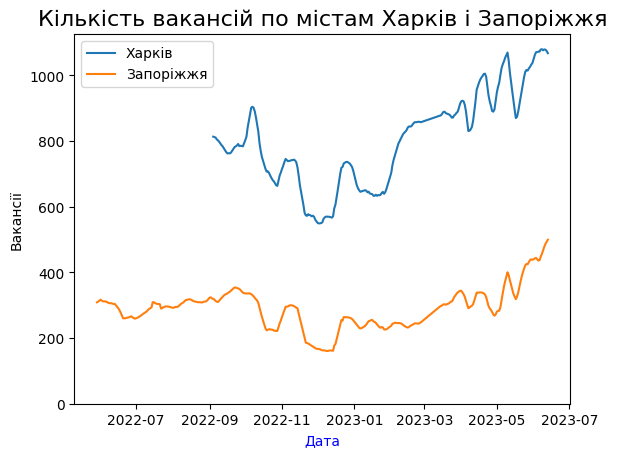

In [ ]:
fig, axs = plt.subplots()
axs.plot(df_harkiv.index, df_harkiv['rolling_mean'], label = "Харків")
axs.plot(df_zaporijja.index, df_zaporijja['rolling_mean'], label = "Запоріжжя")
plt.title("Кількість вакансій по містам Харків і Запоріжжя", fontsize = 16)
plt.xlabel("Дата", color = 'blue')
plt.ylabel("Вакансії")
plt.ylim(bottom=0)
plt.legend()
plt.show()